In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import utils

In [2]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

# SVMs (with slack variables)

In [3]:
X, Y = load_dataset_up_down(80, 1)
some_noise = np.random.binomial(1, .03, Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)

In [4]:
clf = sklearn.svm.LinearSVC(C=0.1)
clf.fit(X, Y);

Accuracy: 98 


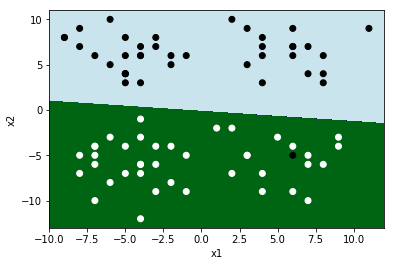

In [5]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Accuracy: 98 


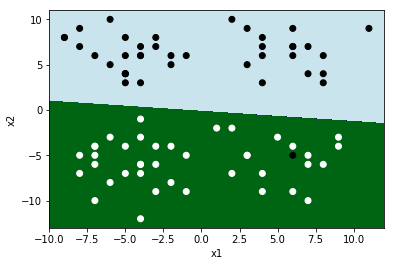

In [6]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

## What about the next scenario?

In [7]:
def load_dataset_disks(size, seed=39):    
    def get_sample_disk(from_, to, size):
        length = np.random.uniform(from_, to, size)
        angle = np.pi * np.random.uniform(0, 2, size)
        x = length * np.cos(angle)
        y = length * np.sin(angle)
        return np.array(list(zip(x,y)))

    np.random.seed(seed)
    size1 = int(size / 2)
    size2 = size - size1
    X = np.concatenate((get_sample_disk(0, 1, size1), get_sample_disk(1, 2, size2)))
    Y = np.concatenate((np.ones(size1), -np.ones(size2)))
    return X, Y

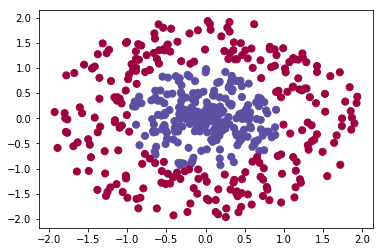

In [8]:
X, Y = load_dataset_disks(500)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### Let's try to use our SVMs

In [12]:
clf = sklearn.svm.LinearSVC(C=2)
clf.fit(X, Y);

TypeError: __init__() got an unexpected keyword argument 'kernel'

Accuracy: 52 


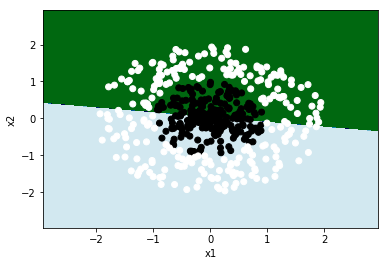

In [10]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))